# Análisis de Ventas en Amazon y Sistema de Recomendación

¡Bienvenidos al proyecto de Análisis de Ventas en Amazon!

En este proyecto, se analiza el dataset "Amazon Sales Dataset" disponible en Kaggle para identificar preferencias de clientes, patrones de compra, y comportamientos clave. Además, se desarrolla un sistema de recomendación que sugiere productos a los usuarios basándose en sus intereses y comportamientos anteriores.

## Objetivos del Proyecto
Los pasos para realizar el análisis son:

- **📊 Recopilación de datos:** Utilizar el "Amazon Sales Dataset" disponible en Kaggle, que incluye información detallada sobre productos, calificaciones y reseñas de más de 1,000 productos.

- **🧹 Preparación de datos:** Limpiar y pre procesar el conjunto de datos para asegurar su calidad y adecuación para el análisis posterior.

- **🕵️‍♂️ Análisis exploratorio de datos:** Explorar los datos para comprender mejor la distribución de los productos por categorías, las calificaciones de los clientes y el contenido de las reseñas.

- **📈 Visualización de datos:** Crear visualizaciones claras y efectivas para identificar tendencias y patrones en las ventas, las calificaciones y las opiniones de los usuarios.

- **💡 Desarrollo de un sistema de recomendación sencillo:** Implementar un sistema de recomendación utilizando un algoritmo de filtrado colaborativo basado en KNN, con la similitud de Pearson. Este algoritmo compara a los usuarios en función de sus calificaciones a productos similares y luego sugiere productos que podrían interesarles.

## 📊 Recopilación de datos
## Características:

- **product_id:** ID del producto.
- **product_name:** Nombre del producto.
- **category:** Categoría del producto.
- **discounted_price:** Precio con descuento del producto.
- **actual_price:** Precio real del producto.
- **discount_percentage:** Porcentaje de descuento del producto.
- **rating:** Calificación del producto.
- **rating_count:** Número de personas que votaron por la calificación de Amazon.
- **about_product:** Descripción sobre el producto.
- **user_id:** ID del usuario que escribió la reseña del producto.
- **user_name:** Nombre del usuario que escribió la reseña del producto.
- **review_id:** ID de la reseña del usuario.
- **review_title:** Breve reseña.
- **review_content:** Revisión larga.
- **img_link:** Enlace de imagen del producto.
- **product_link:** Enlace al sitio web oficial del producto.

## 🧹 Preparación de datos

In [1]:
# Asegurarse de tener instaladas las siguientes bibliotecas antes de ejecutar el código:
# !conda install -c conda-forge scikit-surprise -y  (para la librería Surprise)
# !pip install wordcloud (para la librería wordcloud)

In [7]:
# Importar librerías y paquetes necesarios para el desarrollo de la actividad
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from surprise import Dataset, Reader, KNNBasic
from surprise.model_selection import train_test_split
from surprise import accuracy

In [8]:
# Cargar los datos en un DataFrame de Pandas
df = pd.read_csv('/Users/marti/Desktop/proyecto-amazon/Amazon-Products-Project/data/amazon.csv')

In [10]:
# Comprobar numero de filas y columnas
df.shape

(1465, 16)

In [11]:
# Comprobar valores faltantes con funcion python
def check_missing_values(dataframe):
    return dataframe.isnull().sum()

# Imprimir la cantidad de valores nulos por columna
print(check_missing_values(df))

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64


In [12]:
# Filtrar y mostrar las filas donde la columna 'rating_count' tiene valores nulos(NaN)
df[df.rating_count.isnull()]

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
282,B0B94JPY2N,Amazon Brand - Solimo 65W Fast Charging Braide...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹999,80%,3.0,NaN,USB C to C Cable: This cable has type C connec...,AE7CFHY23VAJT2FI4NZKKP6GS2UQ,Pranav,RUB7U91HVZ30,The cable works but is not 65W as advertised,I have a pd supported car charger and I bought...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Amazon-Brand-Charging-Su...
324,B0BQRJ3C47,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple...",Computers&Accessories|Accessories&Peripherals|...,₹249,₹999,75%,5.0,NaN,💎[The Fastest Charge] - This iPhone USB C cabl...,AGJC5O5H5BBXWUV7WRIEIOOR3TVQ,Abdul Gafur,RQXD5SAMMPC6L,Awesome Product,Quick delivery.Awesome ProductPacking was good...,https://m.media-amazon.com/images/I/31-q0xhaTA...,https://www.amazon.in/REDTECH-Lightning-Certif...


In [13]:
# Eliminar filas con valores faltantes en la columna rating_count con dropna()
df.dropna(subset=['rating_count'], inplace=True)
print(check_missing_values(df))

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64


In [14]:
# Buscar duplicados con funcion python
def check_duplicates(dataframe):
    return dataframe.duplicated().sum()

print(check_duplicates(df))

0


In [15]:
# Verificar tipos de datos
def check_data_types(dataframe):
    return dataframe.dtypes

print(check_data_types(df))


product_id             object
product_name           object
category               object
discounted_price       object
actual_price           object
discount_percentage    object
rating                 object
rating_count           object
about_product          object
user_id                object
user_name              object
review_id              object
review_title           object
review_content         object
img_link               object
product_link           object
dtype: object


In [16]:
# Limpiar y convertir las columnas para obtener valores numericos limpios
df['discounted_price'] = df['discounted_price'].astype(str).str.replace('₹', '', regex=False).str.replace(',', '', regex=False).astype(float)
df['actual_price'] = df['actual_price'].astype(str).str.replace('₹', '', regex=False).str.replace(',', '', regex=False).astype(float)
df['discount_percentage'] = df['discount_percentage'].astype(str).str.replace('%','', regex=False).astype(float)/100

In [17]:
# Contar las filas con el carácter '|' en la columna 'rating'
count = df['rating'].str.contains('|', regex=False).sum()
print(f"Total de filas con '|' en la columna 'rating': {count}")

Total de filas con '|' en la columna 'rating': 1


In [18]:
# Eliminar las filas que contengan el caracter '|'
df = df[df['rating'].apply(lambda x: '|' not in str(x))]

In [19]:
# Verificar que han sido eliminadas
count = df['rating'].str.contains('|', regex=False).sum()
print(f"Total de líneas con '|' en la columna 'rating' después de la limpieza: {count}")

Total de líneas con '|' en la columna 'rating' después de la limpieza: 0


In [20]:
# Limpiar las columnas y convertirlas a flotante
df['rating'] = df['rating'].astype(str).str.replace(',', '.').astype(float)
df['rating_count'] = df['rating_count'].astype(str).str.replace(',', '').astype(float)

In [21]:
print(check_data_types(df))

product_id              object
product_name            object
category                object
discounted_price       float64
actual_price           float64
discount_percentage    float64
rating                 float64
rating_count           float64
about_product           object
user_id                 object
user_name               object
review_id               object
review_title            object
review_content          object
img_link                object
product_link            object
dtype: object


In [22]:
# Creando columna 'rating_weighted'
df['rating_weighted'] = df['rating'] * df['rating_count']

In [23]:
# Dividir columna 'category' en dos nuevas columnas:
# sub_category: último subelemento de la categoría.
# main_category: primer elemento de la categoría.

df['sub_category'] = df['category'].astype(str).str.split('|').str[-1]
df['main_category'] = df['category'].astype(str).str.split('|').str[0]

In [24]:
# Primeros elementos
df[['category', 'main_category', 'sub_category']].head()

,category,main_category,sub_category
0,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories,USBCables
1,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories,USBCables
2,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories,USBCables
3,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories,USBCables
4,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories,USBCables


In [25]:
# Ultimos elementos
df[['category', 'main_category', 'sub_category']].tail()

,category,main_category,sub_category
1460,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,Home&Kitchen,WaterPurifierAccessories
1461,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,Home&Kitchen,Rice&PastaCookers
1462,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...",Home&Kitchen,HeatConvectors
1463,"Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...",Home&Kitchen,ExhaustFans
1464,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,Home&Kitchen,SandwichMakers


In [26]:
# Mostrar las nuevas columnas
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link', 'rating_weighted',
       'sub_category', 'main_category'],
      dtype='object')

In [27]:
# Transformar las columnas a codigos numericos
df['user_id_encoded'] = df['user_id'].astype('category').cat.codes
df['product_id_encoded'] = df['product_id'].astype('category').cat.codes

In [28]:
# Definir el formato de lectura para Surprise
reader = Reader(rating_scale=(1, 5))

In [29]:
# Cargar los datos en el formato adecuado para Surprise
data = Dataset.load_from_df(df[['user_id_encoded', 'product_id_encoded', 'rating']], reader)

In [30]:
# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
trainset, testset = train_test_split(data, test_size=0.2)

## 🕵️‍♂️ Análisis exploratorio de datos(EDA) y 📈 Visualización de datos

#### 1. Analizar la distribución de productos por categoría utilizando un gráfico de barras

In [33]:
# Analizar la distribución de productos por categoría principal.
# Seleccion de las 30 categorías principales.
main_category_counts = df['main_category'].value_counts()[:10]

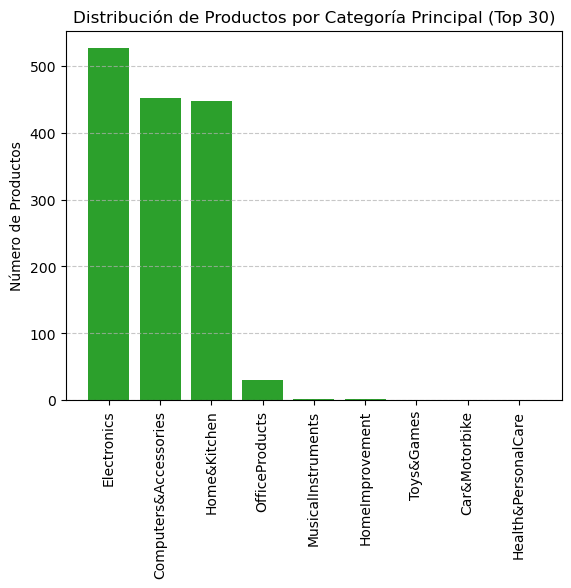

In [34]:
# Crear grafico de barras
plt.bar(range(len(main_category_counts)), main_category_counts.values, color='#2ca02c')
plt.ylabel('Número de Productos')
plt.title('Distribución de Productos por Categoría Principal (Top 30)')
plt.xticks(range(len(main_category_counts)), main_category_counts.index, rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [35]:
# Top 30 categorias principales
top_main_categories = pd.DataFrame({'Categoría Principal': main_category_counts.index, 'Número de Productos': main_category_counts.values})
print('Las 30 Categorías Principales:')
print(top_main_categories.to_string(index=False))

Las 30 Categorías Principales:
  Categoría Principal  Número de Productos
          Electronics                  526
Computers&Accessories                  451
         Home&Kitchen                  447
       OfficeProducts                   31
   MusicalInstruments                    2
      HomeImprovement                    2
           Toys&Games                    1
        Car&Motorbike                    1
  Health&PersonalCare                    1


#### Conclusiones Basadas en los Resultados:

**Categorías Populares:** Las categorías más populares entre los clientes son Electronics, Computers & Accessories, y Home & Kitchen.

**Categorías Menos Populares:** En comparación con las tres principales, las demás categorías tienen una cantidad significativamente menor de productos, lo que sugiere que no son tan demandadas.

**Categorías con Baja Oferta:** Categorías como Office Products, Musical Instruments, Home Improvement, Toys & Games, Car & Motorbike, y Health & Personal Care muestran una oferta muy limitada de productos, lo que indica una demanda posiblemente menor.

In [37]:
# Analizar la distribución de productos por última categoría.
# Seleccion de las 30 ultimas categorias principales
sub_category_counts = df['sub_category'].value_counts()[:30]

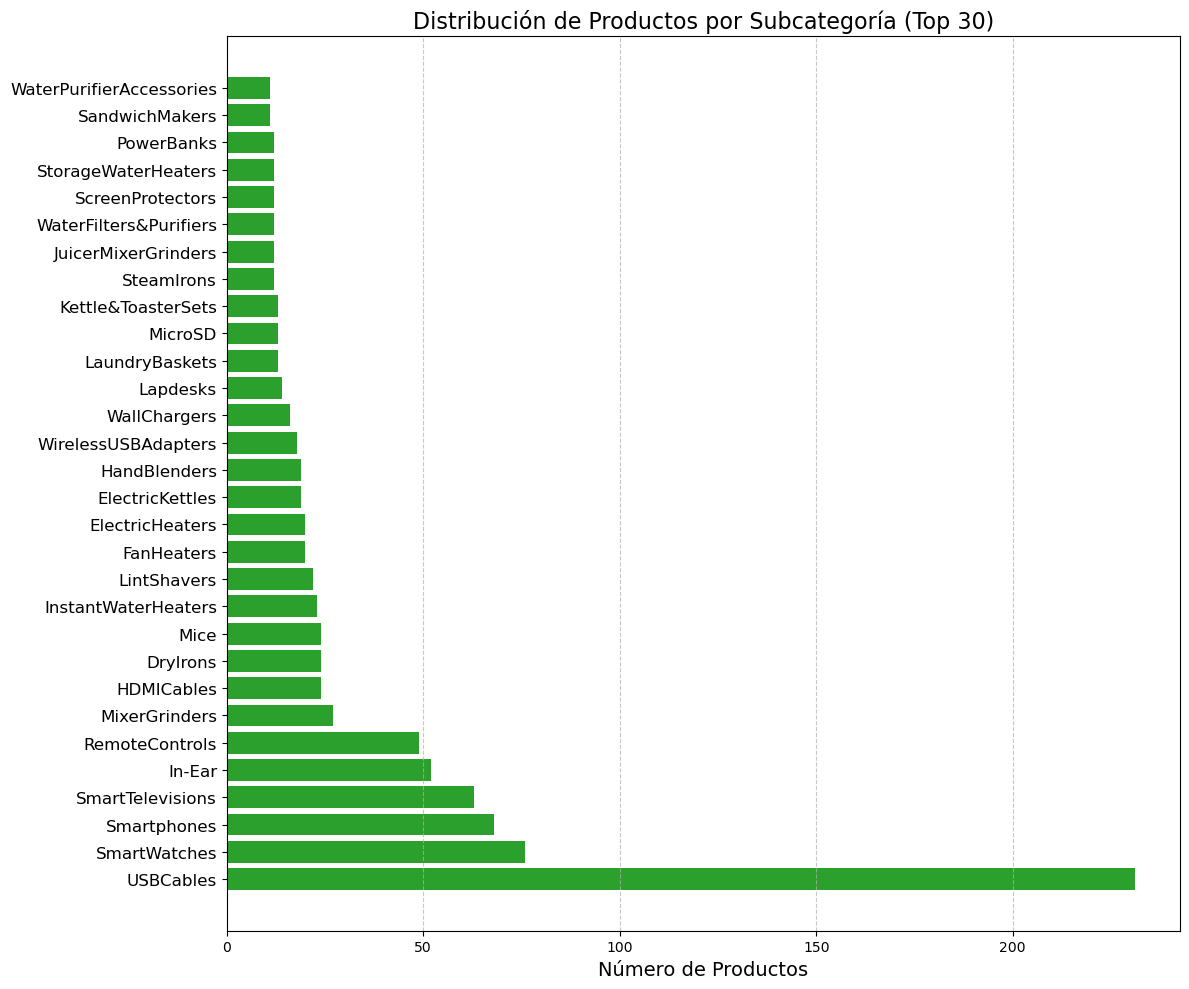

In [38]:
# Crear gráfico de barras horizontal
plt.figure(figsize=(12, 10))  # Ajusta el tamaño del gráfico para mejorar la legibilidad.
plt.barh(range(len(sub_category_counts)), sub_category_counts.values, color='#2ca02c')  # Usa 'barh' para un gráfico horizontal
plt.xlabel('Número de Productos', fontsize=14)  # Cambia el eje Y a X
plt.title('Distribución de Productos por Subcategoría (Top 30)', fontsize=16)
plt.yticks(range(len(sub_category_counts)), sub_category_counts.index, fontsize=12)  # Usa 'yticks' para las etiquetas en el eje Y
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Cambia el eje de las líneas de cuadrícula a 'x'
plt.tight_layout()  # Ajusta el espaciado para evitar que las etiquetas se superpongan.
plt.show()

In [39]:
# Top 30 subcategorias principales
top_sub_categories = pd.DataFrame({'Sub Categoria': sub_category_counts.index, 'Numero de Productos': sub_category_counts.values})
print('Top 30 Sub Categorias:')
print(top_sub_categories.to_string(index=False))

Top 30 Sub Categorias:
           Sub Categoria  Numero de Productos
               USBCables                  231
            SmartWatches                   76
             Smartphones                   68
        SmartTelevisions                   63
                  In-Ear                   52
          RemoteControls                   49
           MixerGrinders                   27
              HDMICables                   24
                DryIrons                   24
                    Mice                   24
     InstantWaterHeaters                   23
             LintShavers                   22
              FanHeaters                   20
         ElectricHeaters                   20
         ElectricKettles                   19
            HandBlenders                   19
     WirelessUSBAdapters                   18
            WallChargers                   16
                Lapdesks                   14
          LaundryBaskets                   13
           

#### Conclusiones Basadas en los Resultados:

**Principales Subcategorías:** Las seis subcategorías más destacadas son USBCables, SmartWatches, Smartphones, SmartTelevisions, In-Ear, RemoteControls. Estas subcategorías son las más populares, lo que sugiere que las empresas podrían beneficiarse al centrarse en ofrecer productos dentro de estas áreas para atraer a un mayor número de clientes.

**Subcategorías Notables:** Otras subcategorías con una demanda considerable incluyen MixerGrinders, HDMICables, DryIrons, Mice, InstantWaterHeaters. Aunque estas categorías no alcanzan el nivel de popularidad de las seis principales, siguen representando una parte significativa del mercado.

**Variedad de Productos:** Los datos revelan una amplia diversidad entre las 30 subcategorías principales, abarcando desde electrodomésticos de cocina hasta productos electrónicos para el hogar y accesorios personales. Esto subraya la importancia de ofrecer una gama variada de productos para satisfacer las distintas necesidades y preferencias de los clientes.

#### 2. Analizar la distribución de las calificaciones de los clientes mediante un histograma

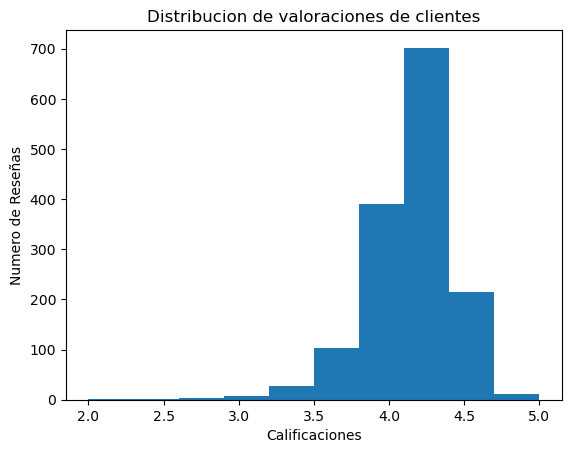

In [42]:
# Crear histograma
plt.hist(df['rating'])
plt.xlabel('Calificaciones')
plt.ylabel('Numero de Reseñas')
plt.title('Distribucion de valoraciones de clientes')
plt.show()

In [43]:
# Definir los intervalos (clusters) para las calificaciones
bins = [0, 1, 2, 3, 4, 5]  # Define los limites de cada intervalo
labels = ['0-1', '1-2', '2-3', '3-4', '4-5']  # Etiquetas para los intervalos

# Crear una nueva columna en el DataFrame con los clusters de calificación
df['cluster'] = pd.cut(df['rating'], bins=bins, include_lowest=True, labels=labels)

# Contar el número de reseñas en cada cluster
table = df['cluster'].value_counts().reset_index()

# Renombrar las columnas para mayor claridad
table.columns = ['Cluster', 'Numero de Reseñas']

# Ordenar la tabla por los nombres de los clusters (orden natural)
table = table.sort_values(by='Cluster')
print(table)

  Cluster  Numero de Reseñas
4     0-1                  0
3     1-2                  1
2     2-3                  8
1     3-4                525
0     4-5                928


#### Conclusiones Basadas en los Resultados
**Distribución de Valoraciones:** La mayoría de las valoraciones de los clientes se encuentran en los rangos **3-4 y 4-5**, acumulando un total de **1453 reseñas**, lo que indica una tendencia hacia valoraciones positivas.

**Aumento Notable en Reseñas de Rango Medio:** Se observa un aumento significativo en la cantidad de reseñas dentro del rango **2-3**, superando a los rangos más bajos 0-1 y 1-2, lo que sugiere que aunque los productos cumplen las expectativas, no siempre superan las mismas.

**Oportunidades de Mejora en Valoraciones Bajas:** El rango **0-1** tiene la menor cantidad de reseñas, lo que podría indicar problemas de satisfacción en algunos productos, representando una oportunidad para analizar y mejorar aspectos críticos.

**Tendencias Generales:** La distribución general sugiere que, si bien la mayoría de los clientes están satisfechos con los productos, existen oportunidades para aumentar la satisfacción y, en consecuencia, las valoraciones positivas.

#### 2.1 Calcular las categorías principales por calificación promedio y visualizarlo en un gráfico de barras

In [46]:
# Calcular las 10 principales categorías en función de su calificación promedio.
top = df.groupby(['main_category'])['rating'].mean().sort_values(ascending=False).head(10).reset_index()

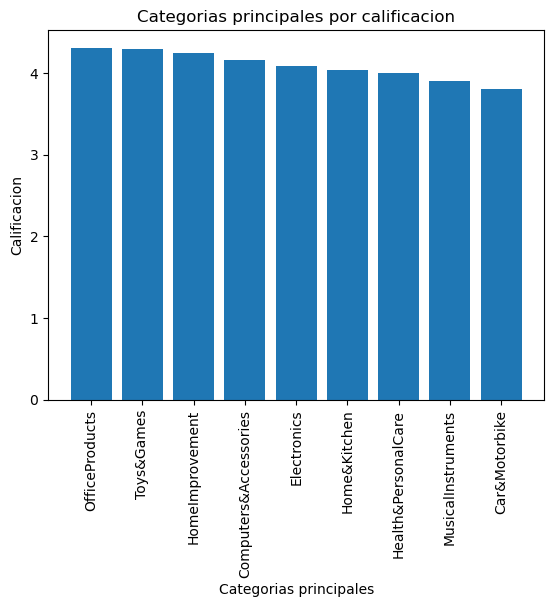

In [47]:
# Crear un grafico de barras 
plt.bar(top['main_category'], top['rating'])
plt.xlabel('Categorias principales')
plt.ylabel('Calificacion')
plt.title('Categorias principales por calificacion')
plt.xticks(rotation=90)
plt.show()

In [48]:
# Se muestra el cálculo del promedio de calificación sin limitarse a las 10 principales.
ranking = df.groupby('main_category')['rating'].mean().sort_values(ascending=False).reset_index()
print(ranking)

           main_category    rating
0         OfficeProducts  4.309677
1             Toys&Games  4.300000
2        HomeImprovement  4.250000
3  Computers&Accessories  4.155654
4            Electronics  4.081749
5           Home&Kitchen  4.040716
6    Health&PersonalCare  4.000000
7     MusicalInstruments  3.900000
8          Car&Motorbike  3.800000


#### Conclusiones Basadas en los Resultados
Al observar la tabla de categorías ordenadas por su calificación promedio, se destacan tendencias interesantes respecto a la satisfacción del cliente.

**Principales categorías mejor valoradas:** Las categorías de OfficeProducts, Toys&Games, y HomeImprovement, lideran con calificaciones superiores a 4.0. Esto refleja un alto nivel de satisfacción por parte de los clientes en estas áreas, lo que sugiere que los productos en dichas categorías cumplen o superan las expectativas de los compradores.

**Categorías con oportunidades de mejora:** En el otro extremo, las categorías de Car&Motorbike, MusicalInstruments, y Health&PersonalCare presentan calificaciones inferiores a 4.0. Esto podría ser indicativo de ciertos aspectos en los que los productos de estas categorías no están satisfaciendo completamente las expectativas del consumidor, lo que abre oportunidades para optimizar la calidad o la oferta en estas áreas.

**Popularidad en tecnología:** Es importante destacar que las categorías tecnológicas como Computers&Accessories y Electronics también mantienen calificaciones por encima de 4.0, reafirmando su popularidad y alta aceptación entre los usuarios.

**Conclusion general:** Esta tabla proporciona un panorama valioso sobre el rendimiento de diferentes categorías de productos, permitiendo a las empresas identificar tanto sus fortalezas como áreas potenciales de mejora. Esto es clave para tomar decisiones estratégicas que optimicen la satisfacción del cliente y el rendimiento comercial.

#### 2.2 Calcular las subcategorias principales por calificaciones promedio mas altas y visualizarlo en un grafico de barras

In [51]:
# Calcular las 10 principales categorías en función de su calificación promedio.
top = df.groupby(['sub_category'])['rating'].mean().sort_values(ascending=False).head(10).reset_index()

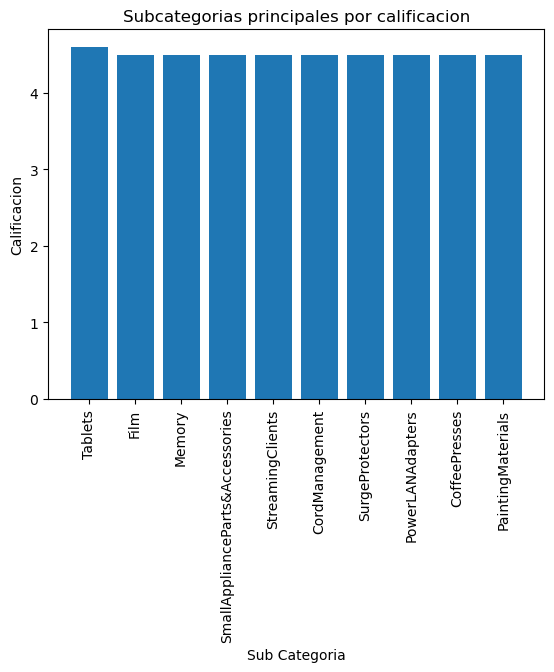

In [52]:
# Crear un grafico de barras 
plt.bar(top['sub_category'], top['rating'])
plt.xlabel('Sub Categoria')
plt.ylabel('Calificacion')
plt.title('Subcategorias principales por calificacion')
plt.xticks(rotation=90)
plt.show()

In [53]:
# Se muestran el cálculo del promedio de calificación sin limitarse a las 10 principales.
ranking = df.groupby('sub_category')['rating'].mean().sort_values(ascending=False).reset_index()
print(ranking)

                        sub_category  rating
0                            Tablets     4.6
1                               Film     4.5
2                             Memory     4.5
3    SmallApplianceParts&Accessories     4.5
4                   StreamingClients     4.5
..                               ...     ...
202                   InkjetPrinters     3.6
203                       PCHeadsets     3.5
204                        3DGlasses     3.5
205                       DustCovers     3.4
206                 ElectricGrinders     3.3

[207 rows x 2 columns]


#### Conclusiones Basadas en los Resultados
Al observar las subcategorías con las calificaciones más altas y bajas según la retroalimentación de los clientes, obtenemos información valiosa sobre la satisfacción del consumidor en cada segmento.

**Puntos Destacados:** La subcategoría "Tablets" lidera el ranking con una calificación promedio de 4.6, lo que refleja un alto nivel de satisfacción entre los clientes que han adquirido productos en esta categoría.

**Áreas de Mejora:** En el extremo opuesto, subcategorías como "DustCovers" y "ElectricGrinders" presentan calificaciones más bajas, lo que sugiere una menor satisfacción por parte de los usuarios.

**Oportunidades:** Este tipo de análisis puede servir como una herramienta clave para las empresas al identificar áreas en las que se debe mejorar la calidad del producto. Monitorear constantemente la retroalimentación del cliente permite adaptar las estrategias de producto para seguir cumpliendo con sus expectativas y mejorar la experiencia de compra.

#### 2.3 Analizar el porcentaje promedio de descuento por cada categoría principal


In [56]:
# Agrupar datos
mean_discount_by_category = df.groupby('main_category')['discount_percentage'].mean()
mean_discount_by_category = mean_discount_by_category.sort_values(ascending=True)

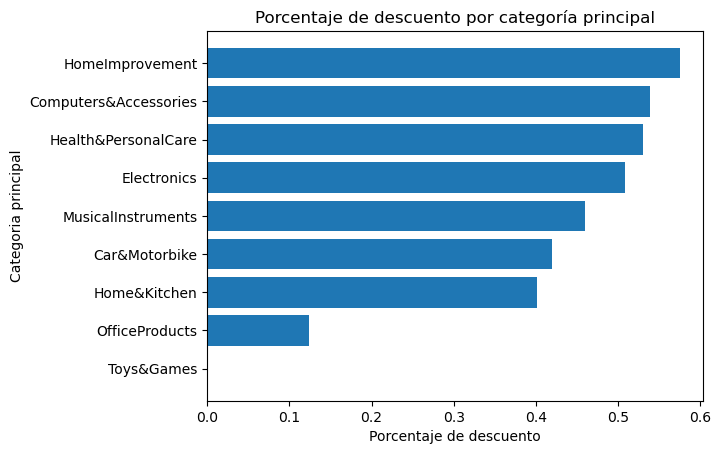

In [57]:
# Crear un grafico de barras horizontal
plt.barh(mean_discount_by_category.index, mean_discount_by_category.values)
plt.title('Porcentaje de descuento por categoría principal')
plt.xlabel('Porcentaje de descuento')
plt.ylabel('Categoria principal')
plt.show()

In [58]:
# Tabla con el porcentaje promedio de descuento por categoría
table = pd.DataFrame({'Main Category': mean_discount_by_category.index, 'Mean Discount Percentage': mean_discount_by_category.values})
print(table)

           Main Category  Mean Discount Percentage
0             Toys&Games                  0.000000
1         OfficeProducts                  0.123548
2           Home&Kitchen                  0.401745
3          Car&Motorbike                  0.420000
4     MusicalInstruments                  0.460000
5            Electronics                  0.508289
6    Health&PersonalCare                  0.530000
7  Computers&Accessories                  0.539202
8        HomeImprovement                  0.575000


#### Conclusiones Basadas en los Resultados

**Porcentaje promedio de descuento más bajo:** La categoría Toys & Games tiene un porcentaje de descuento promedio del 0%, lo que sugiere que la demanda en esta categoría podría ser lo suficientemente alta como para que los minoristas no necesiten ofrecer descuentos significativos para incentivar las ventas.

**Porcentajes promedio de descuento similares:** Las categorías Home & Kitchen y Car & Motorbike tienen porcentajes de descuento promedio muy cercanos, con valores de 0.40% y 0.42%, respectivamente. Esto podría indicar que ambas categorías experimentan un nivel similar de competencia, donde los descuentos, aunque moderados, son efectivos para atraer a los consumidores.

**Porcentaje promedio de descuento más alto:** Las categorías con los porcentajes de descuento promedio más altos son Home Improvement (57.5%), Computers & Accessories (53.9%) y Electronics (50.8%). Esto sugiere que estas categorías son más sensibles al precio, lo que obliga a los minoristas a ofrecer descuentos más grandes para mantenerse competitivos y atraer a los clientes.

**Variación en los descuentos:** Es interesante notar la amplia variación entre las categorías de Office Products (12.3%) y Health & Personal Care (53%). Esto sugiere que algunas categorías, como Office Products, tienen menor sensibilidad al precio, mientras que otras, como Health & Personal Care, requieren descuentos más altos para ser competitivas.

#### 2.4 Agrupar por subcategoría y calcular el descuento promedio, luego ordenar de mayor a menor

In [61]:
mean_discount_by_sub_category = df.groupby('sub_category')['discount_percentage'].mean().head(15)
mean_discount_by_sub_category = mean_discount_by_sub_category.sort_values(ascending=False)
mean_discount_by_sub_category

sub_category
Adapters                  0.803333
Bedstand&DeskMounts       0.745000
BasicCases                0.707500
AutomobileChargers        0.580000
Adapters&Multi-Outlets    0.570000
BluetoothSpeakers         0.485000
BackgroundSupports        0.460000
AirFryers                 0.440000
AirPurifiers&Ionizers     0.420000
AVReceivers&Amplifiers    0.360000
BluetoothAdapters         0.330000
BatteryChargers           0.250000
3DGlasses                 0.230000
BasicMobiles              0.185556
Basic                     0.000000
Name: discount_percentage, dtype: float64

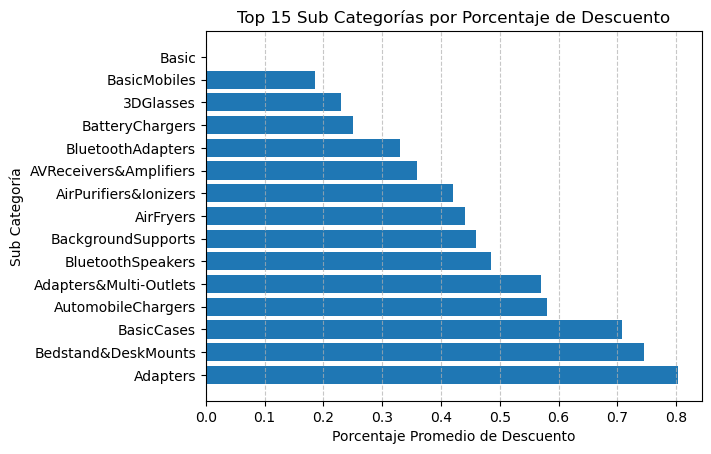

In [62]:
# Crear un grafico de barras horizontal
#plt.figure(figsize=(10, 6))  # Ajustar el tamaño del gráfico
plt.barh(mean_discount_by_sub_category.index, mean_discount_by_sub_category.values)
plt.title('Top 15 Sub Categorías por Porcentaje de Descuento')
plt.xlabel('Porcentaje Promedio de Descuento')
plt.ylabel('Sub Categoría')
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Añadir cuadrícula en el eje X
plt.show()

In [63]:
# Crear tabla con subcategorías y porcentaje de descuento promedio
table = pd.DataFrame({'Sub Categoría': mean_discount_by_sub_category.index, 'Porcentaje Promedio de Descuento': mean_discount_by_sub_category.values})
print(table)

             Sub Categoría  Porcentaje Promedio de Descuento
0                 Adapters                          0.803333
1      Bedstand&DeskMounts                          0.745000
2               BasicCases                          0.707500
3       AutomobileChargers                          0.580000
4   Adapters&Multi-Outlets                          0.570000
5        BluetoothSpeakers                          0.485000
6       BackgroundSupports                          0.460000
7                AirFryers                          0.440000
8    AirPurifiers&Ionizers                          0.420000
9   AVReceivers&Amplifiers                          0.360000
10       BluetoothAdapters                          0.330000
11         BatteryChargers                          0.250000
12               3DGlasses                          0.230000
13            BasicMobiles                          0.185556
14                   Basic                          0.000000


#### Conclusiones Basadas en los Resultados

**Subcategoría con el porcentaje de descuento promedio más bajo:** Básic, con un valor de 0,0%. Esto puede indicar que los productos básicos, que generalmente son de bajo costo y sencillos, no requieren grandes descuentos para atraer a los compradores.

**Subcategoria con el porcentaje de descuento promedio moderado:** BatteryChargers, 3DGlasses, y BasicMobiles, con valores entre el 18% y el 25%. Esto sugiere que estos productos tienen cierta sensibilidad al precio, aunque no tan marcada como en las subcategorías con mayores descuentos.

**Subcategoría con el porcentaje de descuento promedio más alto:** Adapters, con un valor de 80,3%. Esto indica una alta competencia en este tipo de productos, lo que obliga a los minoristas a ofrecer descuentos significativos para atraer a los compradores.

**Subcategoría con mayores descuentos:** BluetoothSpeakers, Bedstand&DeskMounts, and BasicCases, con porcentajes que oscilan entre el 48,5% y el 74,5%. Esto sugiere que los productos en estas subcategorías son más sensibles al precio, y los minoristas podrían necesitar ofrecer descuentos más agresivos para mantenerse competitivos.

Esta tabla demuestra que el porcentaje de descuento promedio varía considerablemente entre las subcategorías, lo que sugiere que los minoristas deben ajustar sus estrategias de precios y descuentos de manera específica para cada tipo de producto a fin de competir eficazmente en el mercado.


#### 3. Analizar el contenido de las reseñas de los clientes creando una nube de palabras para visualizar las palabras más frecuentes en los textos

In [66]:
# Esto crea un gran texto que contiene todas las reseñas
review_text = ' '.join(df['review_content'].dropna().values)

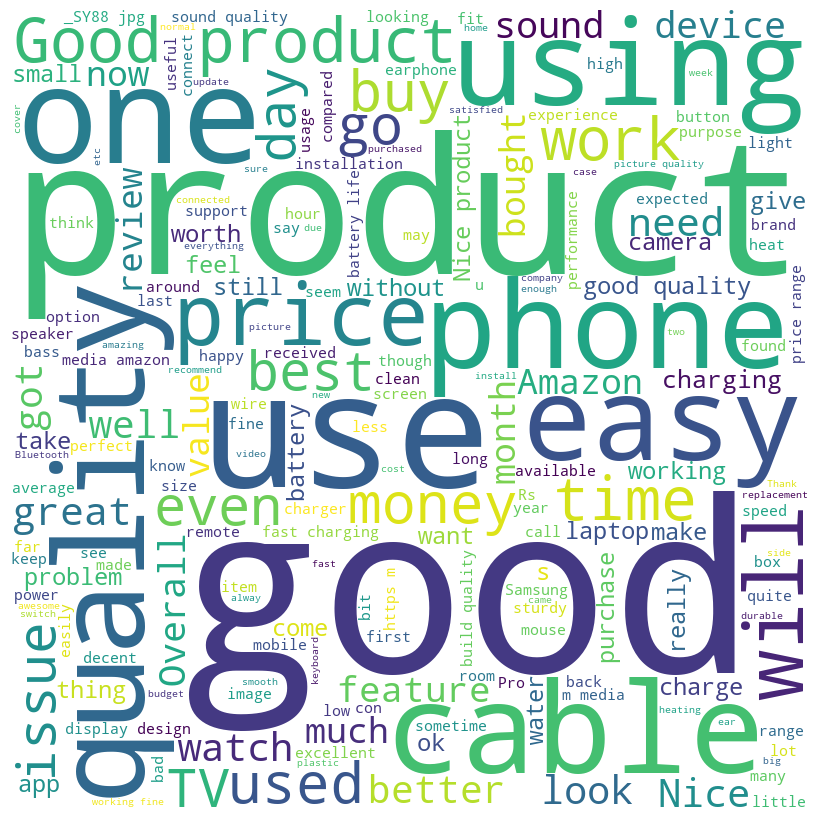

In [67]:
# Generar nube de palabras utilizando la librería WordCloud
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(review_text)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

El código genera una **nube de palabras** basada en el contenido de las reseñas de los clientes, lo que permite visualizar las palabras más frecuentes en el conjunto de datos. Cuanto mayor sea el tamaño de una palabra en la nube, mayor es su frecuencia de aparición en las reseñas.

Esta visualización es útil para identificar **tendencias y patrones** en los comentarios de los clientes, como las características del producto más mencionadas, problemas recurrentes o aspectos que los clientes valoran positivamente. Además, puede ofrecer una perspectiva sobre el sentimiento general de los clientes, ayudando a las empresas a identificar áreas clave de mejora y ajustar sus productos y servicios en función de las expectativas y experiencias de los usuarios.

#### 3.1 Analizar Nube de palabras para productos con una calificación superior a 4

In [70]:
# Filtrar el dataframe para incluir solo productos con una calificación mayor a 4
high_rating_df = df[df['rating'] > 4.0]

In [71]:
# Crear una cadena con todas las reseñas para estos productos
reviews_text = ' '.join(high_rating_df['review_content'].dropna().values)

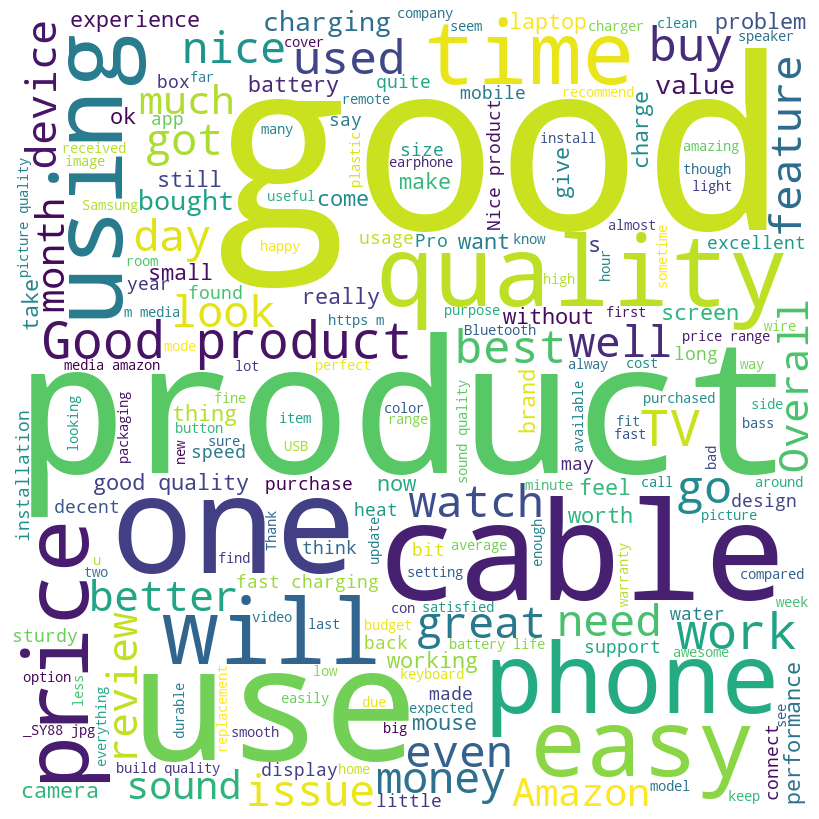

In [72]:
# Generar la nube de palabras
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(reviews_text)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

#### 4. Análisis de correlación para identificar relaciones estadísticas entre las características numéricas en el conjunto de datos, como:
- Relación entre el precio del producto y la calificación del cliente.
- Relación entre el descuento y el precio original
- Relación entre las calificaciones y la cantidad de reseñas

In [74]:
# Filtrar columnas numericas
numeric_cols = df.select_dtypes(include=['float64', 'int64'])
numeric_cols

,discounted_price,actual_price,discount_percentage,rating,rating_count,rating_weighted
0,399.0,1099.0,0.64,4.2,24269.0,101929.8
1,199.0,349.0,0.43,4.0,43994.0,175976.0
2,199.0,1899.0,0.90,3.9,7928.0,30919.2
3,329.0,699.0,0.53,4.2,94363.0,396324.6
4,154.0,399.0,0.61,4.2,16905.0,71001.0
...,...,...,...,...,...,...
1460,379.0,919.0,0.59,4.0,1090.0,4360.0
1461,2280.0,3045.0,0.25,4.1,4118.0,16883.8
1462,2219.0,3080.0,0.28,3.6,468.0,1684.8
1463,1399.0,1890.0,0.26,4.0,8031.0,32124.0


In [75]:
# Se calcula la matriz de correlacion utilizando el metodo .corr()
correlation_matrix = numeric_cols.corr()

Este método calcula el coeficiente de correlación de Pearson entre todas las columnas numéricas, que mide la fuerza y la dirección de la relación lineal entre dos variables.

**Correlación positiva (r = 0.9):** A medida que el precio de un producto aumenta, también tienden a aumentar las calificaciones del cliente.

**Correlación negativa (r = -0.8):** A medida que el descuento de un producto aumenta, su precio original disminuye.

**No correlación (r = 0.1):** El precio del producto y el número de reseñas no están relacionados entre sí.

In [77]:
print(correlation_matrix)

                     discounted_price  actual_price  discount_percentage  \
discounted_price             1.000000      0.961910            -0.242298   
actual_price                 0.961910      1.000000            -0.117855   
discount_percentage         -0.242298     -0.117855             1.000000   
rating                       0.121132      0.122467            -0.155679   
rating_count                -0.027304     -0.036215             0.011294   
rating_weighted             -0.027039     -0.035959             0.010701   

                       rating  rating_count  rating_weighted  
discounted_price     0.121132     -0.027304        -0.027039  
actual_price         0.122467     -0.036215        -0.035959  
discount_percentage -0.155679      0.011294         0.010701  
rating               1.000000      0.102235         0.115217  
rating_count         0.102235      1.000000         0.999061  
rating_weighted      0.115217      0.999061         1.000000  


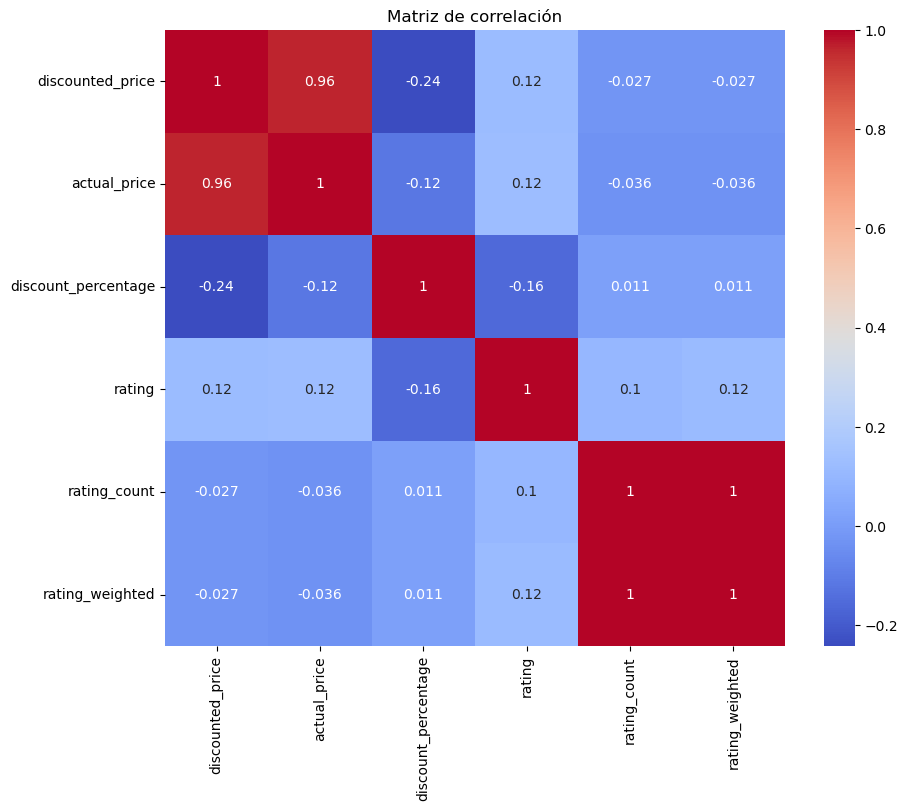

In [78]:
# Mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

**Tonos rojos o naranjas intensos(Variables con alta correlación positiva: > 0.5):** indicador de que esas variables están fuertemente relacionadas de manera positiva.

**Tono azul oscuro(Variables con alta correlación negativa: 0.1-0.3
):** muestra que las dos variables tienen una correlación negativa fuerte.

**Tono Blanco(Baja correlació: 0.3-0.5n):** indican que las variables no están correlacionadas.

#### Conclusiones Basadas en los Resultados

Observamos una correlación positiva débil entre la calificación general y el recuento de reseñas, lo que sugiere que los productos mejor valorados tienden a recibir más reseñas.

 También hay una correlación moderada (0.121) entre la calificación y el precio con descuento, lo que indica que los productos con descuento podrían recibir calificaciones más altas.

 Aunque la correlación no implica causalidad, estos resultados ayudan a entender las relaciones entre las características de los datos.


## 💡 Desarrollo de un sistema de recomendación sencillo

##### Para lograrlo, se implementa un algoritmo de filtrado colaborativo basado en KNNBasic, utilizando la similitud de Pearson. Este algoritmo compara a los usuarios en función de sus calificaciones a productos similares y luego sugiere productos que podrían interesarles.

In [83]:
algo = KNNBasic(sim_options={'name': 'pearson', 'user_based': True})

In [84]:
# Entrenar el modelo con los datos de entrenamiento
algo.fit(trainset)

Computing the pearson similarity matrix...
Done computing similarity matrix.


In [85]:
# Evaluar el modelo con los datos de prueba
predictions = algo.test(testset)
accuracy.rmse(predictions)

RMSE: 0.2842


0.2841520834239285

In [86]:
# Hacer predicciones para un usuario específico
user_id = df['user_id_encoded'].iloc[23]

In [87]:
# Filtrar los productos que este usuario NO ha calificado
user_rated_products = df[df['user_id_encoded'] == user_id]['product_id_encoded']
all_products = df['product_id_encoded'].unique()
products_to_predict = [prod for prod in all_products if prod not in user_rated_products.values]

In [88]:
# Predecir la calificación para los productos no calificados
predicted_ratings = []
for product_id in products_to_predict:
    pred = algo.predict(user_id, product_id)
    predicted_ratings.append((product_id, pred.est))

In [89]:
# Ordenar los productos por las calificaciones predichas
predicted_ratings.sort(key=lambda x: x[1], reverse=True)

In [90]:
# Mostrar los mejores productos recomendados para el usuario
top_n = 5  # Por ejemplo, los 5 mejores productos recomendados
# Crear una lista para almacenar los resultados
recommendations = []

In [91]:
for product_id, predicted_rating in predicted_ratings[:top_n]:
    # Obtener el nombre del producto
    product_name = df[df['product_id_encoded'] == product_id]['product_name'].iloc[0]
    # Añadir el producto y su calificación predicha a la lista
    recommendations.append({'Product': product_name, 'Predicted Rating': predicted_rating})

In [92]:
# Convertir la lista en un DataFrame para que sea más visual
recommendation_df = pd.DataFrame(recommendations)

In [93]:
# Mostrar el DataFrame como una tabla
print(f"Recomendaciones para el usuario {user_id}:")
print(recommendation_df)

Recomendaciones para el usuario 1045:
                                             Product  Predicted Rating
0  Wayona Nylon Braided USB to Lightning Fast Cha...          4.096493
1  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...          4.096493
2  Sounce Fast Phone Charging Cable & Data Sync U...          4.096493
3  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...          4.096493
4  Portronics Konnect L 1.2M Fast Charging 3A 8 P...          4.096493


#### Resultados

El sistema predice las calificaciones de productos no revisados y genera una lista de recomendaciones personalizadas. Por ejemplo, para un usuario específico, se pueden sugerir productos que probablemente obtendrían una calificación alta, optimizando su experiencia de compra.

#### Conclusiones Basadas en los Resultados

Este análisis demuestra que los sistemas de recomendación pueden ser una herramienta poderosa para personalizar la experiencia del usuario en plataformas de comercio electrónico. Al sugerir productos relevantes según los intereses previos, se puede mejorar tanto la satisfacción del cliente como el potencial de ventas.